### Задание
Реализовать самостоятельно логистическую регрессию

Обучить ее методом градиентного спуска

Методом nesterov momentum

Методом rmsprop

Дополнительное задание *

В качестве dataset’а взять Iris, оставив 2 класса:

Iris Versicolor

Iris Virginica

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.pipeline import make_pipeline # используем пайплайны для удобства
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('iris.data', names=['s-', 's-w', 'p-l', 'p-w', 'name'])
df

,s-,s-w,p-l,p-w,name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
df = df[df.name != 'Iris-setosa']    #  Удаляем лишний элемент

In [5]:
df  

,s-,s-w,p-l,p-w,name
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
X = df[['p-l', 'p-w']]
Y = df['name'] 

In [7]:
Y  #  Остались только актуальные виды

50     Iris-versicolor
51     Iris-versicolor
52     Iris-versicolor
53     Iris-versicolor
54     Iris-versicolor
            ...       
145     Iris-virginica
146     Iris-virginica
147     Iris-virginica
148     Iris-virginica
149     Iris-virginica
Name: name, Length: 100, dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
le.fit(Y)

LabelEncoder()

In [10]:
y = pd.Series(le.transform(Y))     # Перевожу названия в формат кода
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int32

######  Реализуем метод логистической регрессии

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [12]:
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=100000))

In [13]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [14]:
predictions[:100]

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0])

In [15]:
model.predict_proba(X_test)

array([[0.76501692, 0.23498308],
       [0.00495467, 0.99504533],
       [0.61787522, 0.38212478],
       [0.00142185, 0.99857815],
       [0.02456816, 0.97543184],
       [0.00356212, 0.99643788],
       [0.81932127, 0.18067873],
       [0.30036009, 0.69963991],
       [0.00714633, 0.99285367],
       [0.02126494, 0.97873506],
       [0.06597591, 0.93402409],
       [0.14145797, 0.85854203],
       [0.01840899, 0.98159101],
       [0.80817398, 0.19182602],
       [0.99890468, 0.00109532],
       [0.99384642, 0.00615358],
       [0.61787522, 0.38212478],
       [0.94840936, 0.05159064],
       [0.3829348 , 0.6170652 ],
       [0.89454527, 0.10545473],
       [0.99890468, 0.00109532],
       [0.02369453, 0.97630547],
       [0.97551389, 0.02448611],
       [0.15063034, 0.84936966],
       [0.97369377, 0.02630623]])

In [16]:
model.score(X_train, y_train) 

0.9466666666666667

In [17]:
model.score(X_test,y_test)

0.96

######  обучаем методом градиентного спуска

In [18]:
X['p-w']

50     1.4
51     1.5
52     1.5
53     1.3
54     1.5
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: p-w, Length: 100, dtype: float64

In [19]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int32

In [20]:
X

,p-l,p-w
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [21]:
y

0     0
1     0
2     0
3     0
4     0
     ..
95    1
96    1
97    1
98    1
99    1
Length: 100, dtype: int32

In [22]:
X = pd.DataFrame(X).to_numpy()

In [23]:
model = LogisticRegression()

In [24]:
model.fit( X, y )

LogisticRegression()

<ipython-input-25-224059c5f549>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


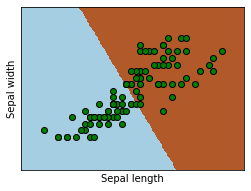

In [25]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c='g', edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Градиентный спуск

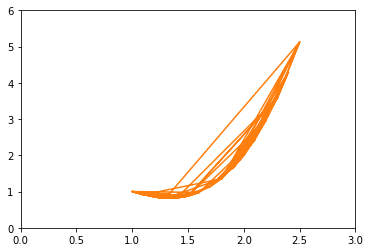

In [26]:
f = lambda x: x**3-2*x**2+2
plt.plot(X,f(X))
plt.xlim([0,3])
plt.ylim([0,6])
plt.show()

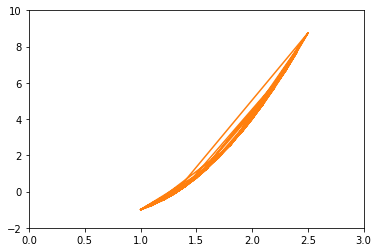

In [27]:
f_prime = lambda x: 3*x**2-4*x
#x = np.linspace(-1,2.5,1000) 
plt.plot(X,f_prime(X))
plt.xlim([0,3])
plt.ylim([-2,10])
plt.show()

In [28]:
lr = 0.1
points = [2]
n_epochs = 15

In [29]:
for _ in range(n_epochs):
    cur_point = points[-1]
    grad = f_prime(cur_point)
    new_point = cur_point - lr * grad
    points.append(new_point)

In [30]:
y_points = [f(p) for p in points]

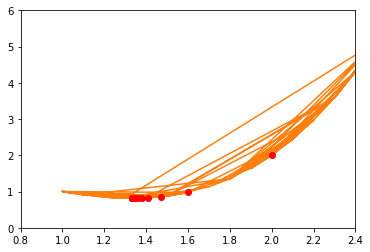

In [31]:
plt.plot(X,f(X))
plt.plot(points, y_points, 'ro')
plt.xlim([0.8,2.4]) 
plt.ylim([0,6])
plt.show()

######  Нестеров модель

Vt = gamma*Vt -1 + ng * J *theta

 theta = theta - Vt

In [32]:
gamma = 0.9
Vt = 1 - gamma

In [33]:
EPOCHS = 20
ng = 0.0001
J_cos = 0.05

In [34]:
def cost_function(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += gamma * Vt
    return gamma * Vt -1 + ng* J_cos*theta1

In [35]:
def der_theta0(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i])
    return total_cost / (len(X))    

In [36]:
def der_theta1(X, y, theta0, theta1):
    total_cost = 0
    for i in range(len(X)):
        total_cost += (theta0 + theta1*X[i] - y[i]) * X[i]
    return total_cost / (len(X))  

In [37]:
theta0 = 1
theta1 = 1
for _ in range(EPOCHS):
    dt0 = der_theta0(X[1], X[2] , theta0, theta1)
    dt1 = der_theta1(X[1], X[2], theta0, theta1)
    
    theta0 = theta0 - Vt * dt0
    theta1 -= Vt * gamma
    
    print("t0:", theta0, "t1:", theta1, "cost:", cost_function(X[1], X[2], theta0, theta1))

t0: 0.92 t1: 0.91 cost: -0.90999545
t0: 0.8750000000000001 t1: 0.8200000000000001 cost: -0.9099959000000001
t0: 0.8615000000000002 t1: 0.7300000000000001 cost: -0.90999635
t0: 0.8763500000000001 t1: 0.6400000000000001 cost: -0.9099968
t0: 0.9167150000000001 t1: 0.5500000000000002 cost: -0.90999725
t0: 0.9800435000000001 t1: 0.4600000000000002 cost: -0.9099977
t0: 1.06403915 t1: 0.3700000000000002 cost: -0.9099981500000001
t0: 1.1666352349999998 t1: 0.28000000000000025 cost: -0.9099986
t0: 1.2859717114999998 t1: 0.19000000000000028 cost: -0.90999905
t0: 1.4203745403499997 t1: 0.1000000000000003 cost: -0.9099995000000001
t0: 1.5683370863149997 t1: 0.010000000000000314 cost: -0.90999995
t0: 1.7285033776834995 t1: -0.07999999999999967 cost: -0.9100004
t0: 1.8996530399151494 t1: -0.16999999999999965 cost: -0.9100008500000001
t0: 2.080687735923634 t1: -0.2599999999999996 cost: -0.9100013
t0: 2.2706189623312705 t1: -0.3499999999999996 cost: -0.91000175
t0: 2.4685570660981435 t1: -0.4399999999

######   Методом rmsprop

Vdw = Beta*Vdw + (1-Beta)*dw**2

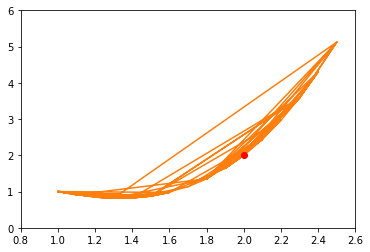

In [38]:
lr = 0.1
points = [2]
n_epochs = 15
Beta = 0.9
theta= 0.01

for _ in range(n_epochs):
    cur_point = points[-1]
    grad = Beta*(cur_point*theta)
    Vdw = Beta * grad + (1 - Beta)*0.2**2
    points.append(Vdw)
    
y_points = [f(p) for p in points]

plt.plot(X,f(X))
plt.plot(points, y_points, 'ro')
plt.xlim([0.8,2.6]) 
plt.ylim([0,6])
plt.show()